# 1. Importing libraries

In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
#import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import pandas as pd
#from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from collections import Counter 
import seaborn as sns
import re
from sklearn.neighbors import KNeighborsClassifier


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


# 2. Accessing csv file with tweets

In [28]:
df = pd.read_csv('tweets.csv',encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# 3.1 Data pre-preprocessing

In [29]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
df.loc[df['sentiment'] == 4, 'sentiment'] = 1
df.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


# 3.2 Data preprocessing - Natural language processing (stopwords removal and stemming)  

In [30]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [31]:
def preprocess(text):
    text = re.sub("@\S+|https?:\S+|http?:\S|\w*\d\w*|[^A-Za-z0-9]+|www?:\S", ' ', str(text).lower())
    text = text.strip()
    tokens = []
    for word in text.split():
        if word not in stop_words:
            if stemmer.stem(word) != word: #checks whether stemming is possible
                tokens.append(stemmer.stem(word))
            else:
                tokens.append(word)
    return " ".join(tokens)

In [32]:
df.text = df.text.apply(lambda x: preprocess(x))
df.head()
#df.text = df.text.apply(preprocess)

,sentiment,text
0,0,upset updat facebook text might cri result sch...
1,0,dive mani time ball manag save rest go bound
2,0,whole bodi feel itchi like fire
3,0,behav mad see
4,0,whole crew


# 4. Most often occuring words

In [33]:
positive_tweets = df[df.sentiment == 1]
negative_tweets = df[df.sentiment == 0]

Text(0.5, 1.0, 'Top 15 Most Occurring Words in Positive Tweets')

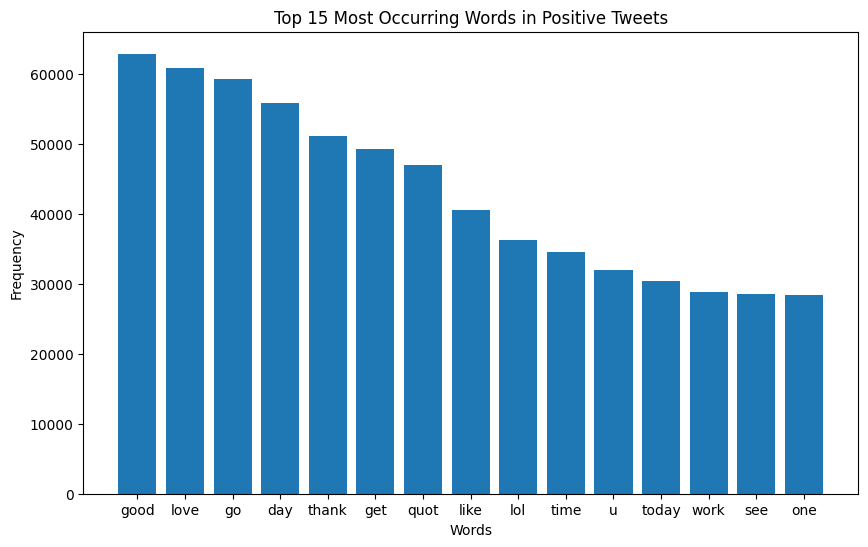

In [34]:
pos_words = " ".join(positive_tweets.text)
pos_words = pos_words.split() 

pos_words_freq = Counter(pos_words)

most_occur = pos_words_freq.most_common(15) 
words, frequencies = zip(*most_occur)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Occurring Words in Positive Tweets')


Text(0.5, 1.0, 'Top 15 Most Occurring Words in negative Tweets')

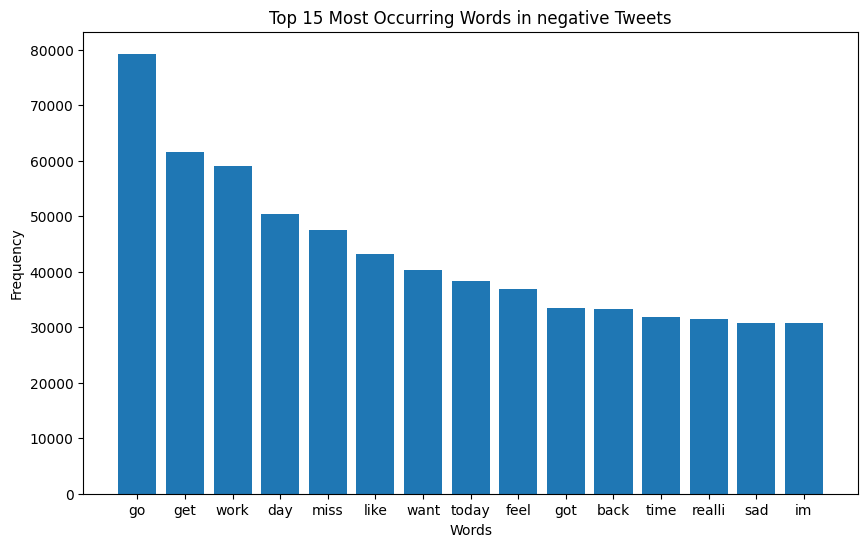

In [35]:
neg_words = " ".join(negative_tweets.text)
neg_words = neg_words.split() 

neg_words_freq = Counter(neg_words)
most_occur2 = neg_words_freq.most_common(15)
words2, frequencies2 = zip(*most_occur2)
plt.figure(figsize=(10, 6))
plt.bar(words2, frequencies2)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Occurring Words in negative Tweets')

Text(0.5, 1.0, 'Top 15 least Occurring Words in negative Tweets')

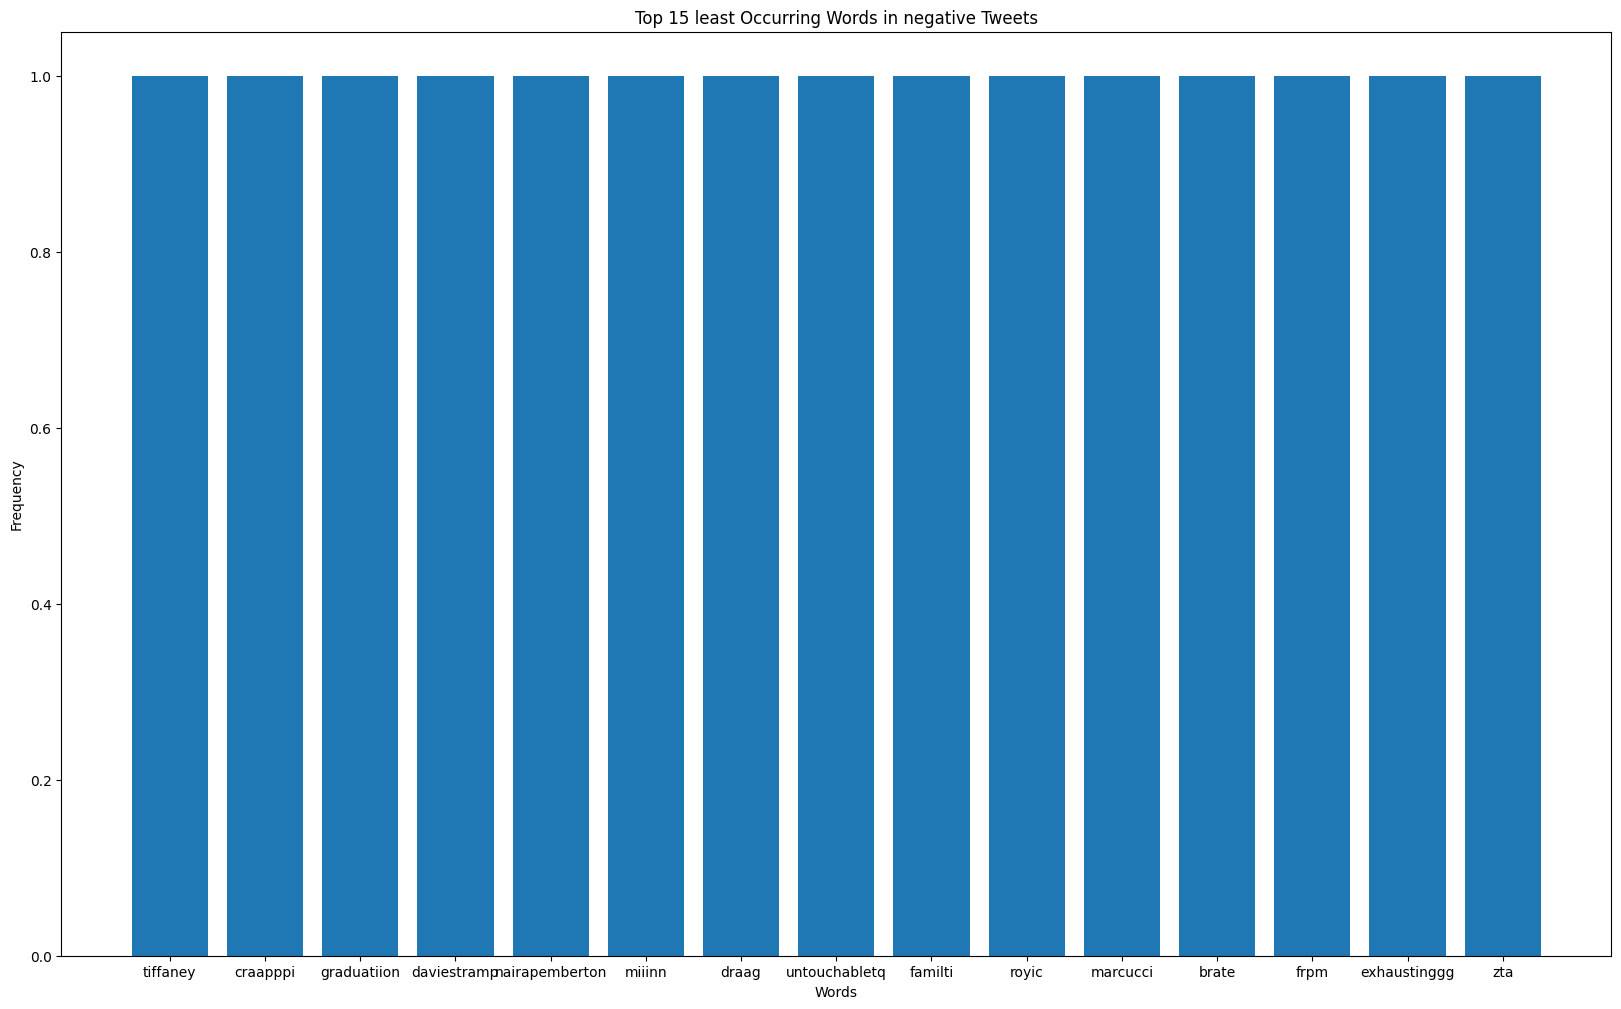

In [36]:
neg_words = " ".join(negative_tweets.text)
neg_words = neg_words.split() 

neg_words_freq = Counter(neg_words)
most_occur2 = neg_words_freq.most_common()[-15:] 
words2, frequencies2 = zip(*most_occur2)
plt.figure(figsize=(20, 12))
plt.bar(words2, frequencies2)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 least Occurring Words in negative Tweets')

# 5. Working algoritms - first prototype

In [37]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000000000)
X = tfidf_vectorizer.fit_transform(df['text'])


In [38]:
y = df['sentiment']


In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = LogisticRegression(max_iter=10000000)
model.fit(X_train, y_train)
model2 = MultinomialNB()
model2.fit(X_train, y_train)


MultinomialNB()

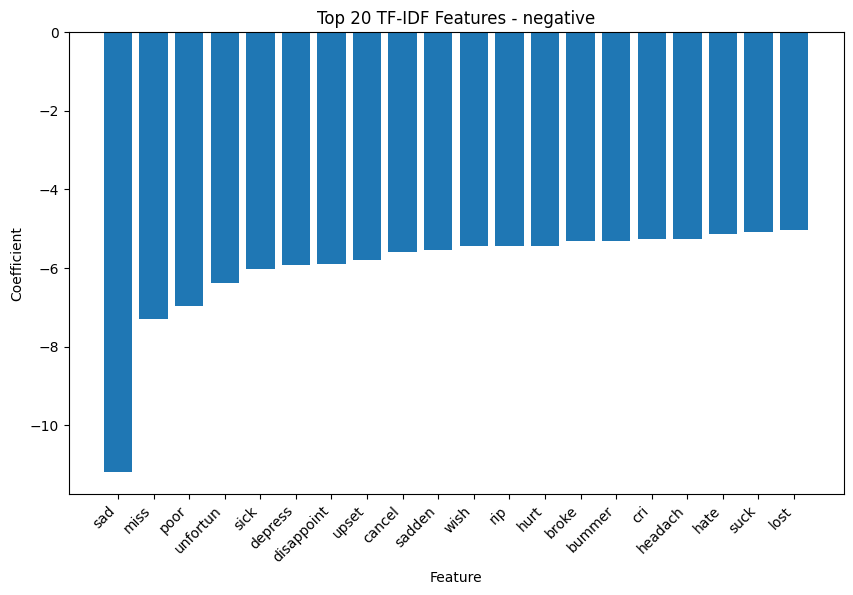

In [40]:
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefficients = model.coef_.flatten()

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=True)

# Display the top N important features
top_features = feature_importance_df.head(20)  # Adjust N as needed
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 20 TF-IDF Features - negative')
plt.xticks(rotation=45, ha='right')
plt.show()

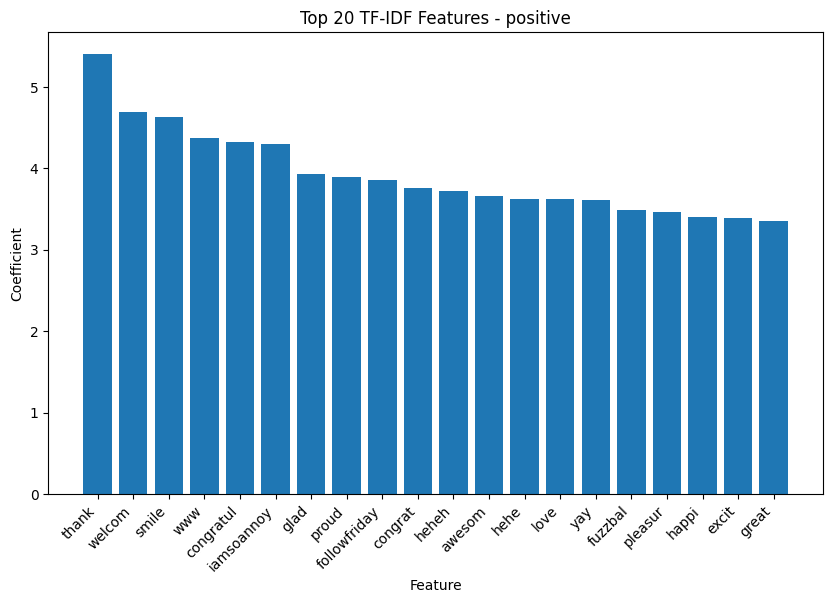

In [41]:
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefficients = model.coef_.flatten()

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Display the top N important features
top_features = feature_importance_df.head(20) 
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 20 TF-IDF Features - positive')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/1790327433.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  accuracy = accuracy_score(y_test[0:i], y_pred)
/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/1790327433.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  conf_matrix = confusion_matrix(y_test[0:i], y_pred)
/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/1790327433.py:11: FutureWarning: The behavior of `series[i:j]` w

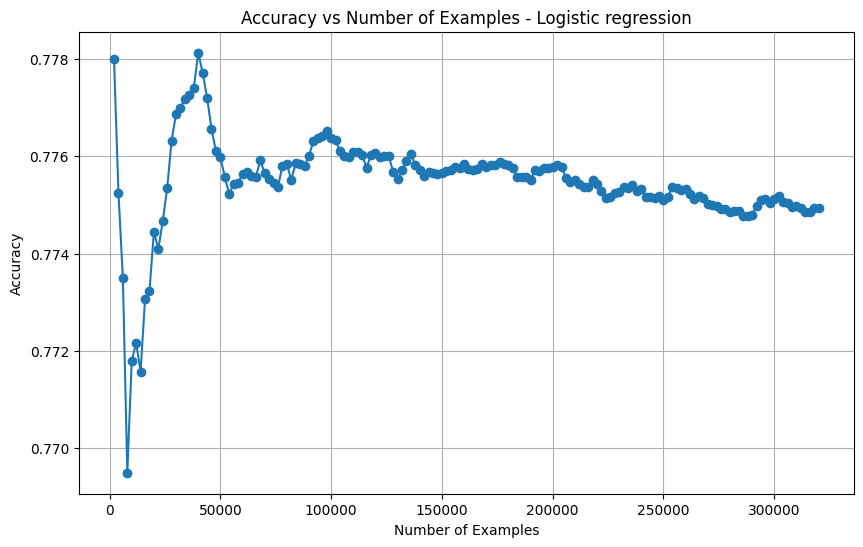

In [42]:
accuracies = []
divider = 2000
for i in range(X_test.shape[0]+1):
    if i%divider==0 and i>0:
        y_pred = model.predict(X_test[0:i])
        accuracy = accuracy_score(y_test[0:i], y_pred)
        #print(f'Accuracy: {accuracy:.2f}')
        #print(classification_report(y_test[0:i], y_pred))
        conf_matrix = confusion_matrix(y_test[0:i], y_pred)
        #print(conf_matrix)
        conf_matrix_normalised = confusion_matrix(y_test[0:i], y_pred, normalize = 'all')
        accuracies.append(accuracy)
        
plt.figure(figsize=(10, 6))
plt.plot(np.arange(divider, X_test.shape[0] + 1, divider), accuracies, marker='o')
plt.xlabel('Number of Examples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Examples - Logistic regression')
plt.grid(True)
plt.show()


/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/2903690351.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  accuracy2 = accuracy_score(y_test[0:i], y_pred2)
/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/2903690351.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  conf_matrix2 = confusion_matrix(y_test[0:i], y_pred2)
/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/2903690351.py:11: FutureWarning: The behavior of `series[i:j

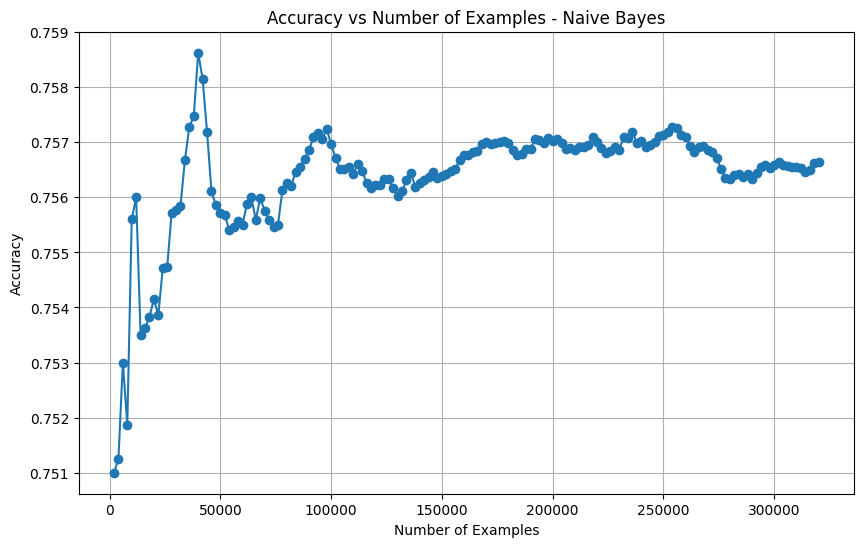

In [43]:



accuracies2 = []
divider2 = 2000
for i in range(X_test.shape[0]+1):
    if i%divider2==0 and i>0:
        y_pred2 = model2.predict(X_test[0:i])
        accuracy2 = accuracy_score(y_test[0:i], y_pred2)
        #print(f'Accuracy: {accuracy:.2f}')
        #print(classification_report(y_test[0:i], y_pred))
        conf_matrix2 = confusion_matrix(y_test[0:i], y_pred2)
        #print(conf_matrix)
        conf_matrix_normalised2 = confusion_matrix(y_test[0:i], y_pred2, normalize = 'all')
        accuracies2.append(accuracy2)
        
plt.figure(figsize=(10, 6))
plt.plot(np.arange(divider2, X_test.shape[0] + 1, divider2), accuracies2, marker='o')
plt.xlabel('Number of Examples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Examples - Naive Bayes')
plt.grid(True)
plt.show()

# 6. Model evaluation

In [44]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy - Logistic regression: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy - Logistic regression: 0.77
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159911
           1       0.76      0.80      0.78    160089

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.77      0.77    320000



In [45]:
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

print(f'Accuracy - Naive bayes: {accuracy2:.2f}')

print(classification_report(y_test, y_pred2))
conf_matrix2 = confusion_matrix(y_test, y_pred2)

Accuracy - Naive bayes: 0.76
              precision    recall  f1-score   support

           0       0.75      0.77      0.76    159911
           1       0.76      0.74      0.75    160089

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



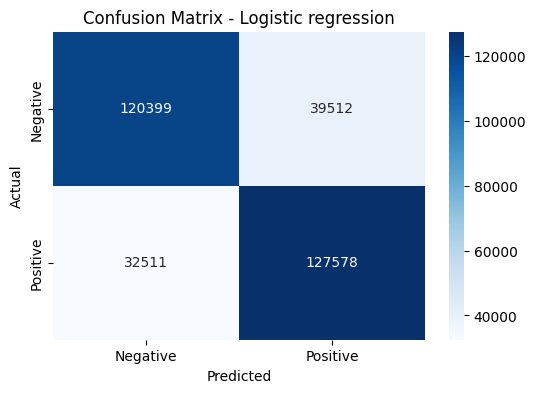

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic regression')
plt.show()

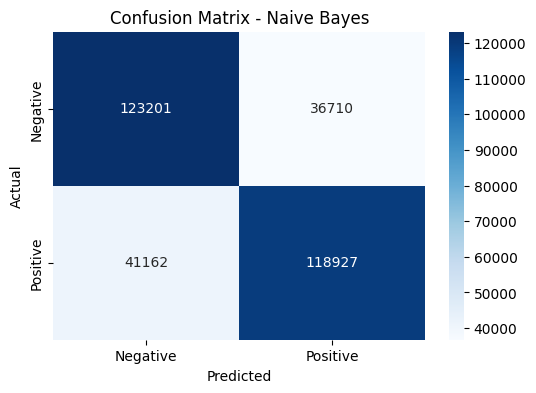

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

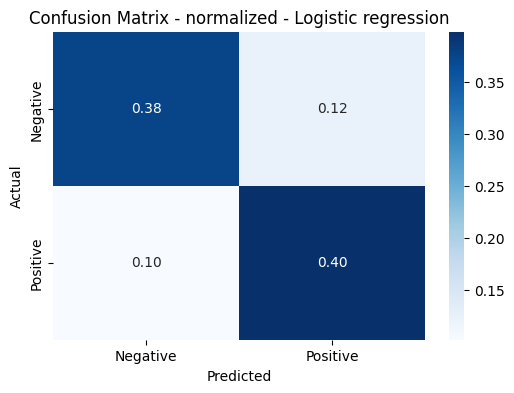

In [48]:

conf_matrix_normalised = confusion_matrix(y_test, y_pred, normalize = 'all')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_normalised, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - normalized - Logistic regression')
plt.show()

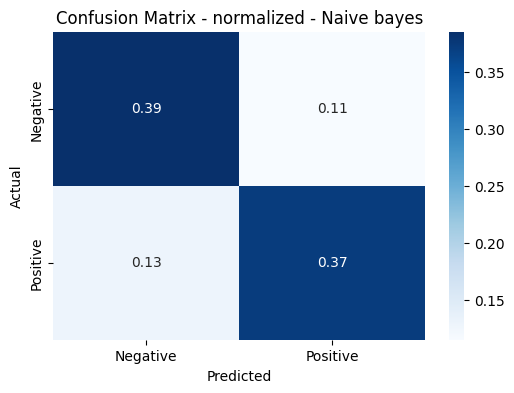

In [49]:

conf_matrix_normalised2 = confusion_matrix(y_test, y_pred2, normalize = 'all')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_normalised2, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - normalized - Naive bayes')
plt.show()

# 7. Unsuccesful approaches

## 7.1 KNN

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.77      0.34      0.48      5046
           1       0.57      0.90      0.70      4954

    accuracy                           0.62     10000
   macro avg       0.67      0.62      0.59     10000
weighted avg       0.67      0.62      0.59     10000



/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/2783496013.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  accuracy = accuracy_score(y_test[0:10000], y_pred)
/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/2783496013.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(classification_report(y_test[0:10000], y_pred))
/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/2783496013.py:11: FutureWarning: The behavior of `series[i

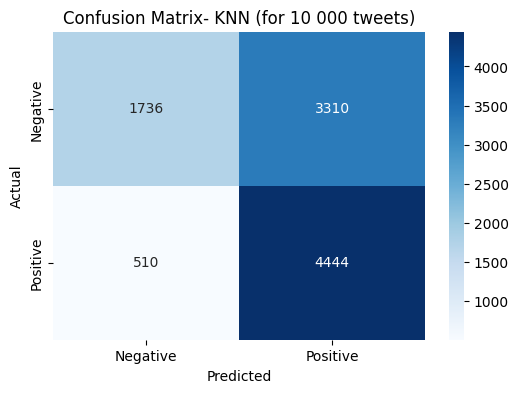

/var/folders/p8/157bhm016k37zcnrc63s1hv00000gn/T/ipykernel_61622/2783496013.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  conf_matrix_normalised = confusion_matrix(y_test[0:10000], y_pred, normalize = 'all')


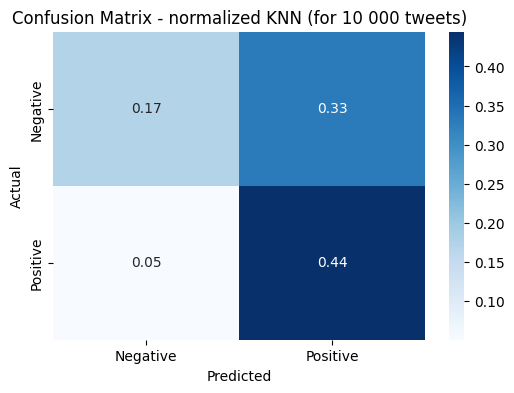

In [50]:
model3 = KNeighborsClassifier(n_neighbors = 99) # for all data k = 99, because it's relatively close to square root of number of all tweets
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test[0:10000])
accuracy = accuracy_score(y_test[0:10000], y_pred)

print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test[0:10000], y_pred))

conf_matrix = confusion_matrix(y_test[0:10000], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- KNN (for 10 000 tweets)')
plt.show()

conf_matrix_normalised = confusion_matrix(y_test[0:10000], y_pred, normalize = 'all')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_normalised, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - normalized KNN (for 10 000 tweets)')
plt.show()

## 7.2 Decision tree

0.50601875
              precision    recall  f1-score   support

           0       0.50      0.96      0.66    159494
           1       0.57      0.06      0.11    160506

    accuracy                           0.51    320000
   macro avg       0.54      0.51      0.38    320000
weighted avg       0.54      0.51      0.38    320000



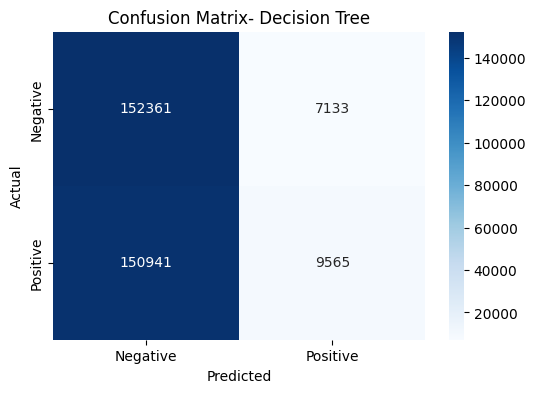

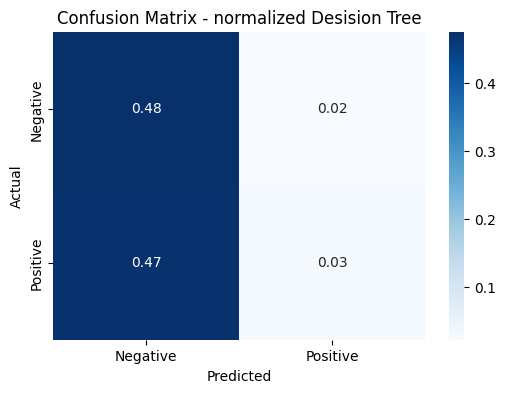

In [53]:
data = df.text
dic = [x for x in preprocess(data) if x not in stop_words]
word_set=set(dic)
word_set1=list(word_set)
data1=np.zeros((len(data),len(word_set)))
for i in range(len(data)):
    words1 = data[i].split()
    for j in range (len(words1)):
        if words1[j] in word_set:
            data1[i][word_set1.index(words1[j])] = 1


x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.20, random_state=42)

clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print(acc)



print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- Decision Tree')
plt.show()

conf_matrix_normalised = confusion_matrix(y_test, y_pred, normalize = 'all')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_normalised, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - normalized Desision Tree')
plt.show()